In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Ecommerce Customers")

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


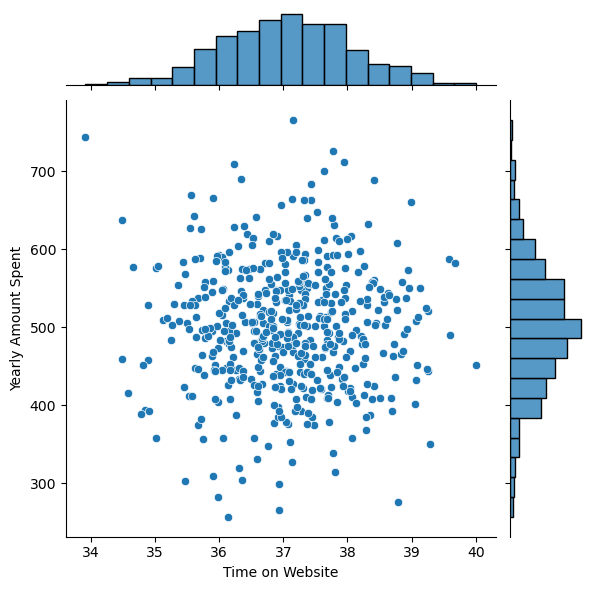

In [6]:
sns.jointplot(x="Time on Website", y="Yearly Amount Spent" , data=df)

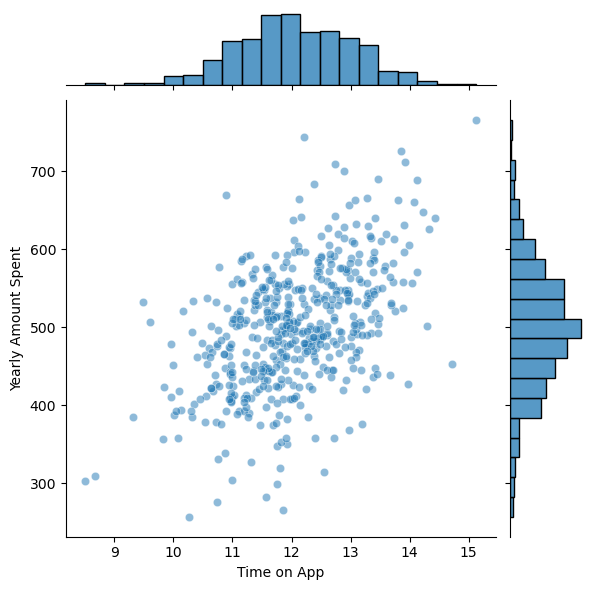

In [7]:
sns.jointplot(x="Time on App", y="Yearly Amount Spent" , data=df, )

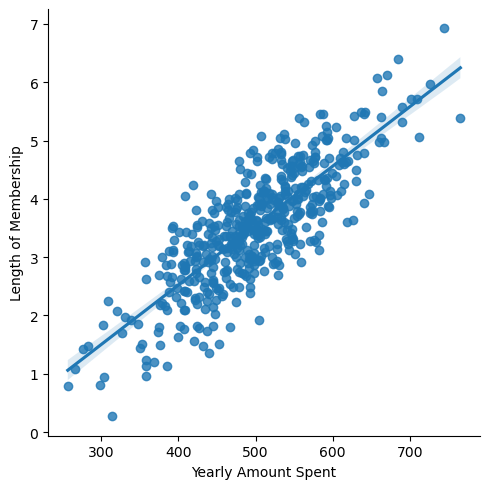

In [11]:
sns.lmplot(y = 'Length of Membership', x='Yearly Amount Spent', data=df )

In [18]:
X = df.drop(['Yearly Amount Spent','Email','Address','Avatar'],axis=1)
y = df['Yearly Amount Spent']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train,y_train)

LinearRegression()

In [34]:
model.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

# Results of all corelation

In [35]:
cdf = pd.DataFrame(model.coef_,X_train.columns,columns=['Cofe'])

In [36]:
cdf

,Cofe
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [24]:
test_prediction = model.predict(X_test)

In [25]:
test_prediction

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

Text(0.5, 0, 'Prediction')

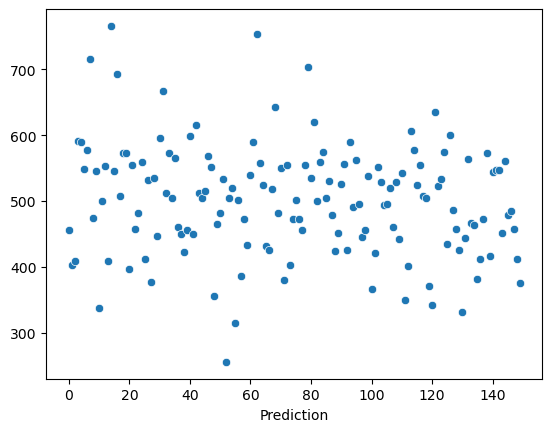

In [39]:
sns.scatterplot(test_prediction)
plt.xlabel('Prediction')

Text(0.5, 0, 'Prediction')

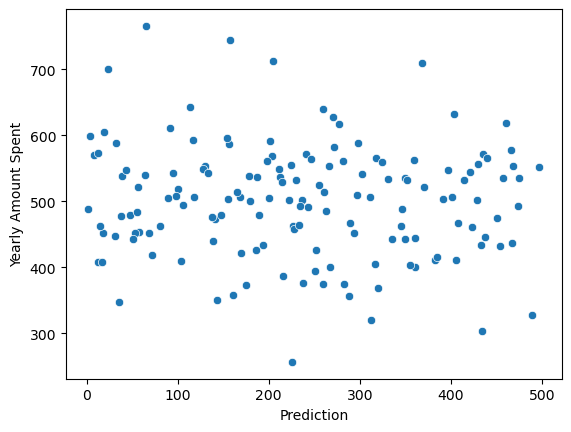

In [40]:
sns.scatterplot(y_test)
plt.xlabel('Prediction')

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
MAE = mean_absolute_error(y_test,test_prediction)
MSE = mean_squared_error(y_test,test_prediction)
RSME = np.sqrt(MSE)

In [29]:
MAE

7.228148653430832

In [30]:
MSE

79.81305165097444

In [31]:
RSME

8.933815066978633

In [33]:
df['Yearly Amount Spent'].mean()

499.31403825859053

# resifual 

In [41]:
res = y_test - test_prediction

In [42]:
res

18    -4.126186
361   -1.686918
104    0.816457
4      7.975058
156   -3.858503
         ...   
147    1.431172
346    3.977230
423    3.521249
17    -3.822028
259   -0.080551
Name: Yearly Amount Spent, Length: 150, dtype: float64

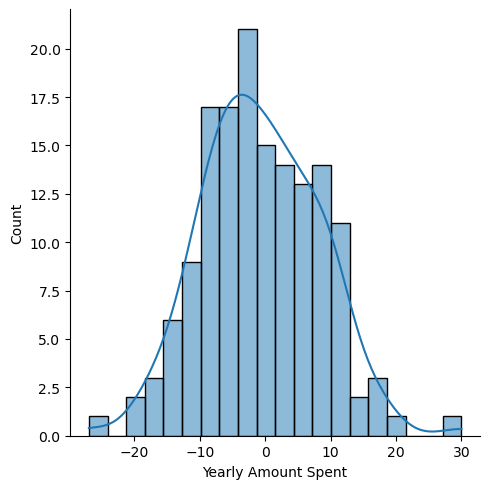

In [45]:
sns.displot(res,bins=20,kde=True)

In [43]:
res.sort_values()

260   -26.955731
168   -19.205390
234   -18.780212
2     -17.760602
454   -17.266110
         ...    
117    16.029076
403    16.774098
200    17.630258
130    18.718343
460    29.998572
Name: Yearly Amount Spent, Length: 150, dtype: float64